In [40]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "classification"

# MNIST

In [2]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.dat[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [ ]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row:(row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [27]:
path = '/tmp/mnist.npz'
f = np.load(path)
X_train, y_train = f['x_train'], f['y_train']
X_test, y_test = f['x_test'], f['y_test']
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
f.close()

<Figure size 648x648 with 0 Axes>

Saving figure more_digits_plot


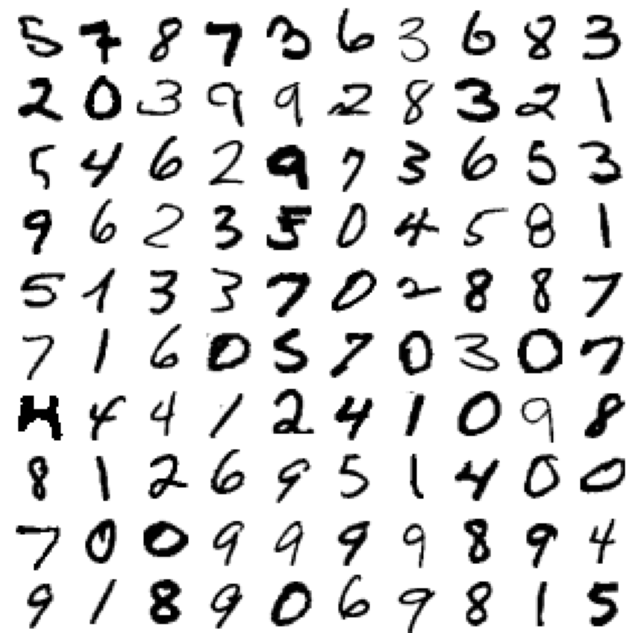

In [28]:
plt.figure(figsize=(9, 9))
example_images = np.r_[X_train[:12000:600], X_train[13000:30600:600], X_train[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [47]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

<AxesSubplot:ylabel='count'>

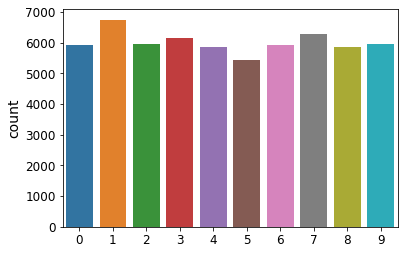

In [45]:
sns.countplot(x = pd.Series(y_train))

In [54]:
print(X_train.shape)
print(y_train_5.shape)

(60000, 28, 28)
(60000,)


In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [61]:
#from sklearn.datasets.base import get_data_home
#from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_mldata

#datasets. fetch_mldata("MNIST Original", "./")
#print(get_data_home())

ImportError: cannot import name 'fetch_mldata' from 'sklearn.datasets' (/Users/shiweili/opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/__init__.py)